Lista 7 Michał Sroka


Zadanie2

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns


data = load_iris()
print(data.DESCR)



.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [89]:
df = pd.DataFrame(data.data, columns=data.feature_names)

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [90]:
X = data.data
y = data.target


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X=X_train, y=y_train)

y_pred = neigh.predict(X=X_test)

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

def specificity_score_multiclass(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    specificities = []
    for i in range(len(cm)):
        # True negatives: sum all except row i and column i
        tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))
        # False positives: sum of column i except diagonal element
        fp = np.sum(cm[:, i]) - cm[i, i]
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificities.append(specificity)
    return np.mean(specificities)

specificitiy = specificity_score_multiclass(y_test, y_pred)
print(accuracy, precision, recall, specificitiy)



1.0 1.0 1.0 1.0


Zad3

In [94]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = data.data
y = data.target

X_scaled = scaler.fit_transform(X)

In [96]:
df = pd.DataFrame(y)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB
None


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)

In [98]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)





In [ ]:


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(accuracy, precision, recall)



0.9736842105263158 0.9722222222222222 0.9859154929577465


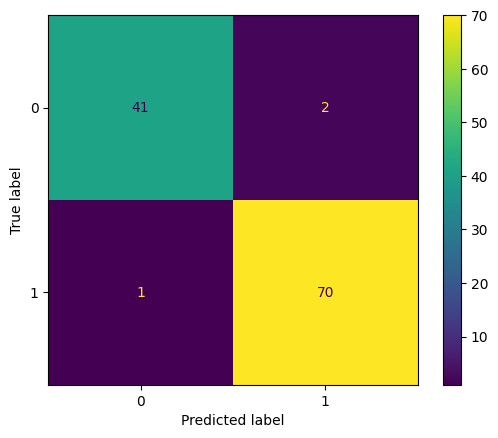

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Zad4

In [101]:
from sklearn.datasets import load_digits

data = load_digits()

print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [102]:
X = data.data
y = data.target

print(X.shape)


(1797, 64)


In [ ]:


scaler = StandardScaler()

X_scaled = scaler.fit_transform(X=X)

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [105]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")

print(accuracy, precision)

0.9805555555555555 0.9829914529914531


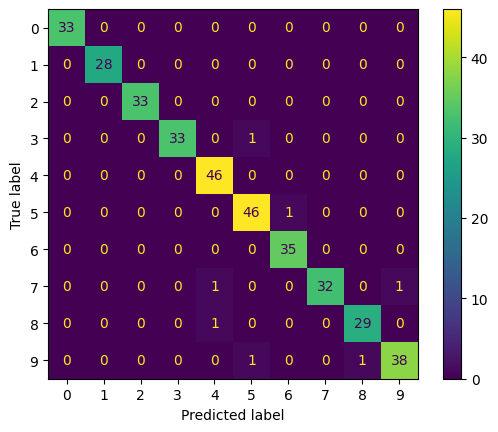

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

plt.show()

Zadanie5

In [ ]:

df = pd.read_csv("Titanic-Dataset.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [109]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [110]:
#usuwam nie potrzebne wierwsze, stringi itp
new_df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

#uzupełniam medianą wiek
median_age = new_df['Age'].median()
new_df['Age'].fillna(value=median_age, inplace=True)

#mapuje wartosci na int
new_df['Sex'] = new_df['Sex'].map({'male':0, 'female':1 })
new_df['Embarked'] = new_df['Embarked'].map({"Q":0,"S":1,"C":2})

#uzupelnaim mediana
median_embarked = new_df["Embarked"].median()
new_df["Embarked"].fillna(value=median_embarked, inplace=True)

print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB
None


C:\Users\micha\AppData\Local\Temp\ipykernel_53892\1232688528.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['Age'].fillna(value=median_age, inplace=True)
C:\Users\micha\AppData\Local\Temp\ipykernel_53892\1232688528.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

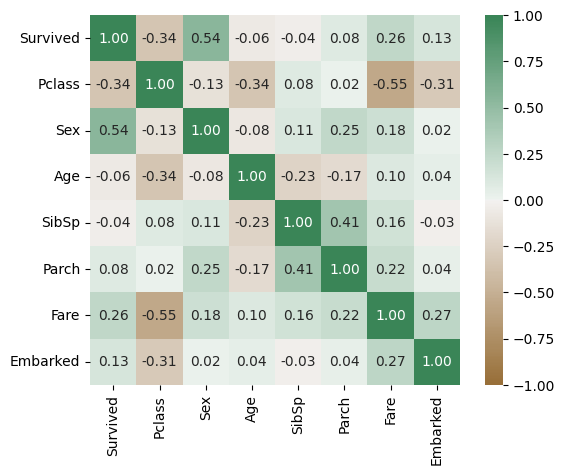

In [111]:
#tworze macierz korelacji
correlation_full_health = new_df.corr()
axis_corr = sns.heatmap(
    correlation_full_health,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 500, n=500),
    square=True,
    annot=True,        
    fmt=".2f"       
)


In [112]:
#wybieram 4 najlepsze cechy
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

X = new_df.drop(['Survived'], axis=1)
y = new_df['Survived']

X.shape

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X=X)

selector = SelectKBest(chi2, k=4).fit(X_scaled,y)

X_new = selector.transform(X_scaled)

selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]
print("Wybrane cechy:", list(selected_features))



Wybrane cechy: ['Pclass', 'Sex', 'Fare', 'Embarked']


In [ ]:
#teraz stworze drzewo decyzyjne

X_tree = X[selected_features]
y_tree = new_df['Survived']

#dziele na dane treningowe i testowe


X_train, X_test, y_train , y_test = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [114]:
y_pred = clf.predict(X_test)

In [ ]:
#dokladnosc
print(accuracy_score(y_test, y_pred))

0.8100558659217877


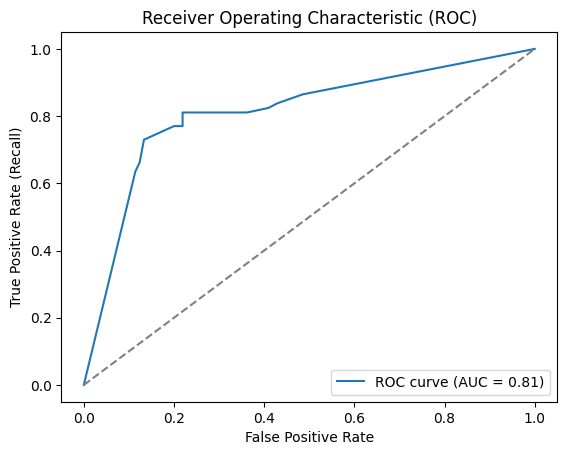

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score


y_prob = clf.predict_proba(X_test)[:, 1]  


fpr, tpr, thresholds = roc_curve(y_test, y_prob)


auc_score = roc_auc_score(y_test, y_prob)


plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # linia losowa
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#teraz tworze regresje logistyczna

X_logistic = X[selected_features]
y_logistic = new_df['Survived']

#standaryzuje dane



scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_logistic)


In [118]:
#tworze regresje liniową i dziele dane
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_logistic, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf = clf.fit(X_train, y_train)

In [ ]:

y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))


0.7821229050279329


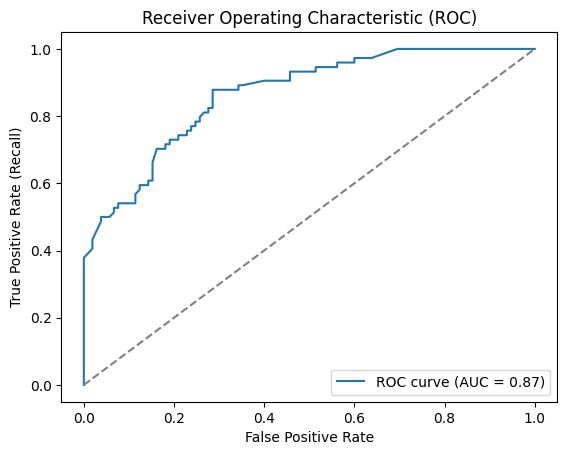

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


y_prob = clf.predict_proba(X_test)[:, 1]  


fpr, tpr, thresholds = roc_curve(y_test, y_prob)


auc_score = roc_auc_score(y_test, y_prob)


plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # linia losowa
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

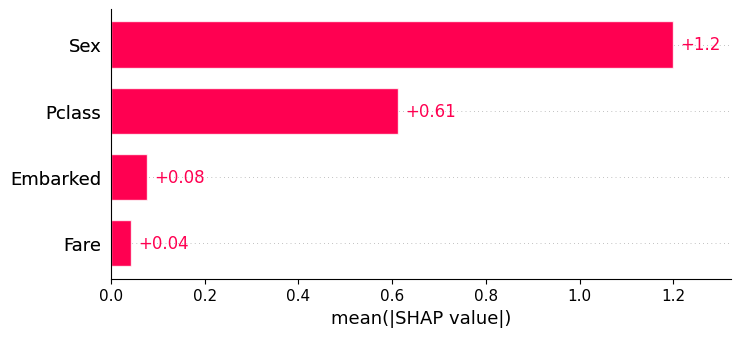

In [ ]:
#jakie cechy wplywają na klase
import shap
import pandas as pd

X_train_named = pd.DataFrame(X_train, columns=selected_features)

#DataFrame do SHAP
explainer = shap.Explainer(clf, X_train_named)
shap_values = explainer(X_train_named)
shap.plots.bar(shap_values)


Zadanie6

In [124]:
#wczytuje dane
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


In [125]:
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

<Axes: >

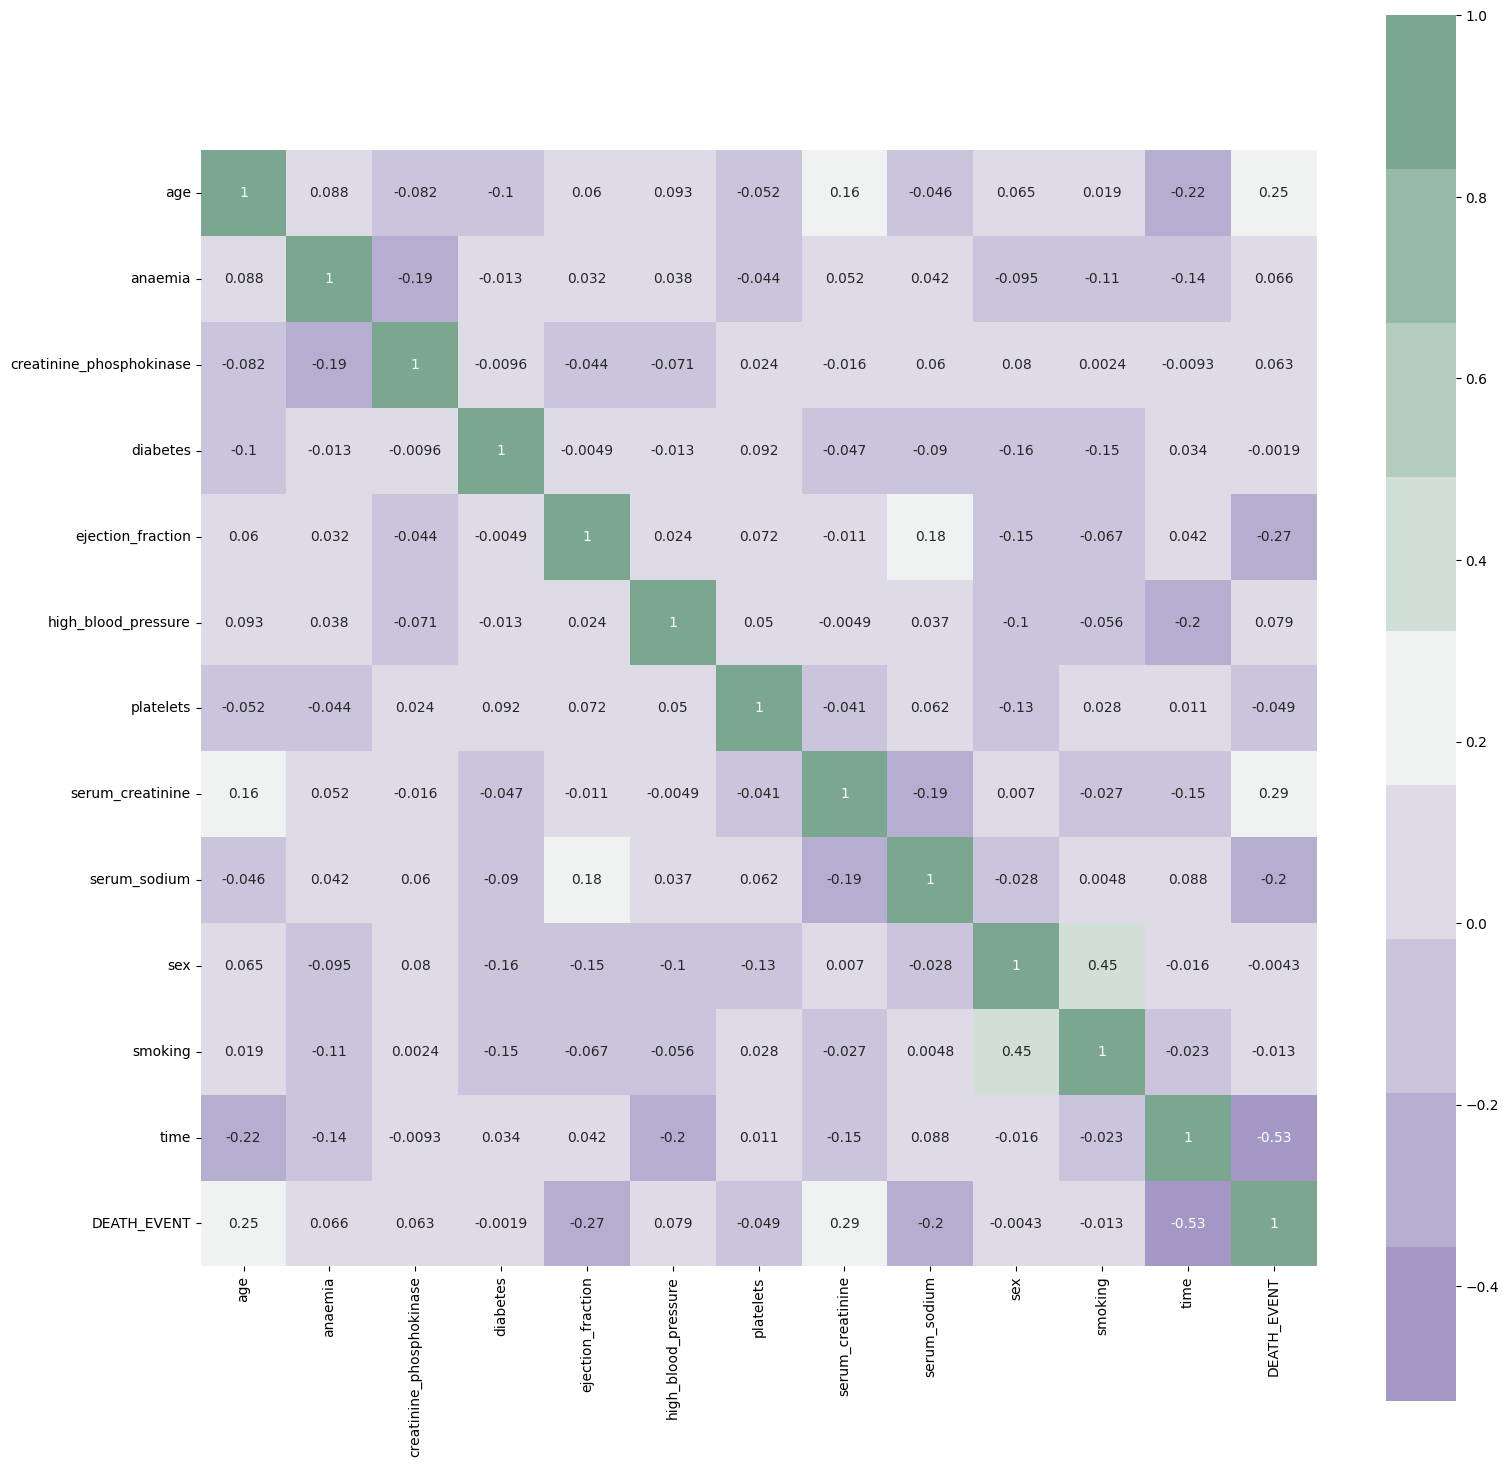

In [132]:
#tworze macier korelacji
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat, cmap=cmap, annot=True, square = True)

In [146]:
from sklearn.feature_selection import SelectKBest, f_classif

#teraz wybiore 5 najelpszych 

X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)

selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]

print(selected_features)

#skaluje dane

X_selected = X[selected_features]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected, y)

Index(['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time'], dtype='object')


In [ ]:
#dziele dane i tworze SVM



X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

from sklearn.svm import SVC

clf = SVC()
clf.fit(X=X_train, y=y_train)

y_pred = clf.predict(X=X_test)

In [ ]:


accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred)

print(accuracy, precision)

0.76 0.5833333333333334


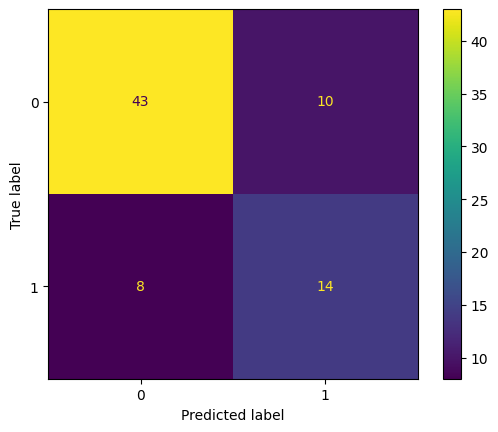

In [ ]:


cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(cm)

disp.plot()

plt.show()

